In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
def create_graph(name, log_sc, title=""):
    with open(f'./results/initialization/{name}.pkl', 'rb') as file:
        logs = pickle.load(file)
    sorted_data = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
    }

    for key, value in logs['norms'].items():
        category = key.split('.')[-1]

        layer_num = int(key.split('.')[2])
        
        sorted_data[category].append((layer_num, value))

    for category in sorted_data:
        sorted_data[category].sort(key=lambda x: x[0])
        
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

    categories = list(sorted_data.keys())

    colors = {'A': 'blueviolet', 'B': 'olivedrab'}


    for i, category in enumerate(categories):
        ax = axes[i // 3, i % 3]
        layers, values = zip(*sorted_data[category])
        a_values = [v['A'] for v in values]
        b_values = [v['B'] for v in values]

        if log_sc:
            ax.semilogy(layers, a_values, label='A', marker='.', color=colors['A'])
            ax.semilogy(layers, b_values, label='B', marker='.', color=colors['B'])
        else:
            ax.plot(layers, a_values, label='A', marker='.', color=colors['A'])
            ax.plot(layers, b_values, label='B', marker='.', color=colors['B'])
        
        # if log_sc:
        #     ax.semilogy(layers, a_values, marker='.', color=colors['A'])
        # else:
        #     ax.plot(layers, a_values, marker='.', color=colors['A'])



        ax.set_title(category)
        ax.set_xlabel('Layer')
        ax.set_ylabel('Norm')
        ax.legend()
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()


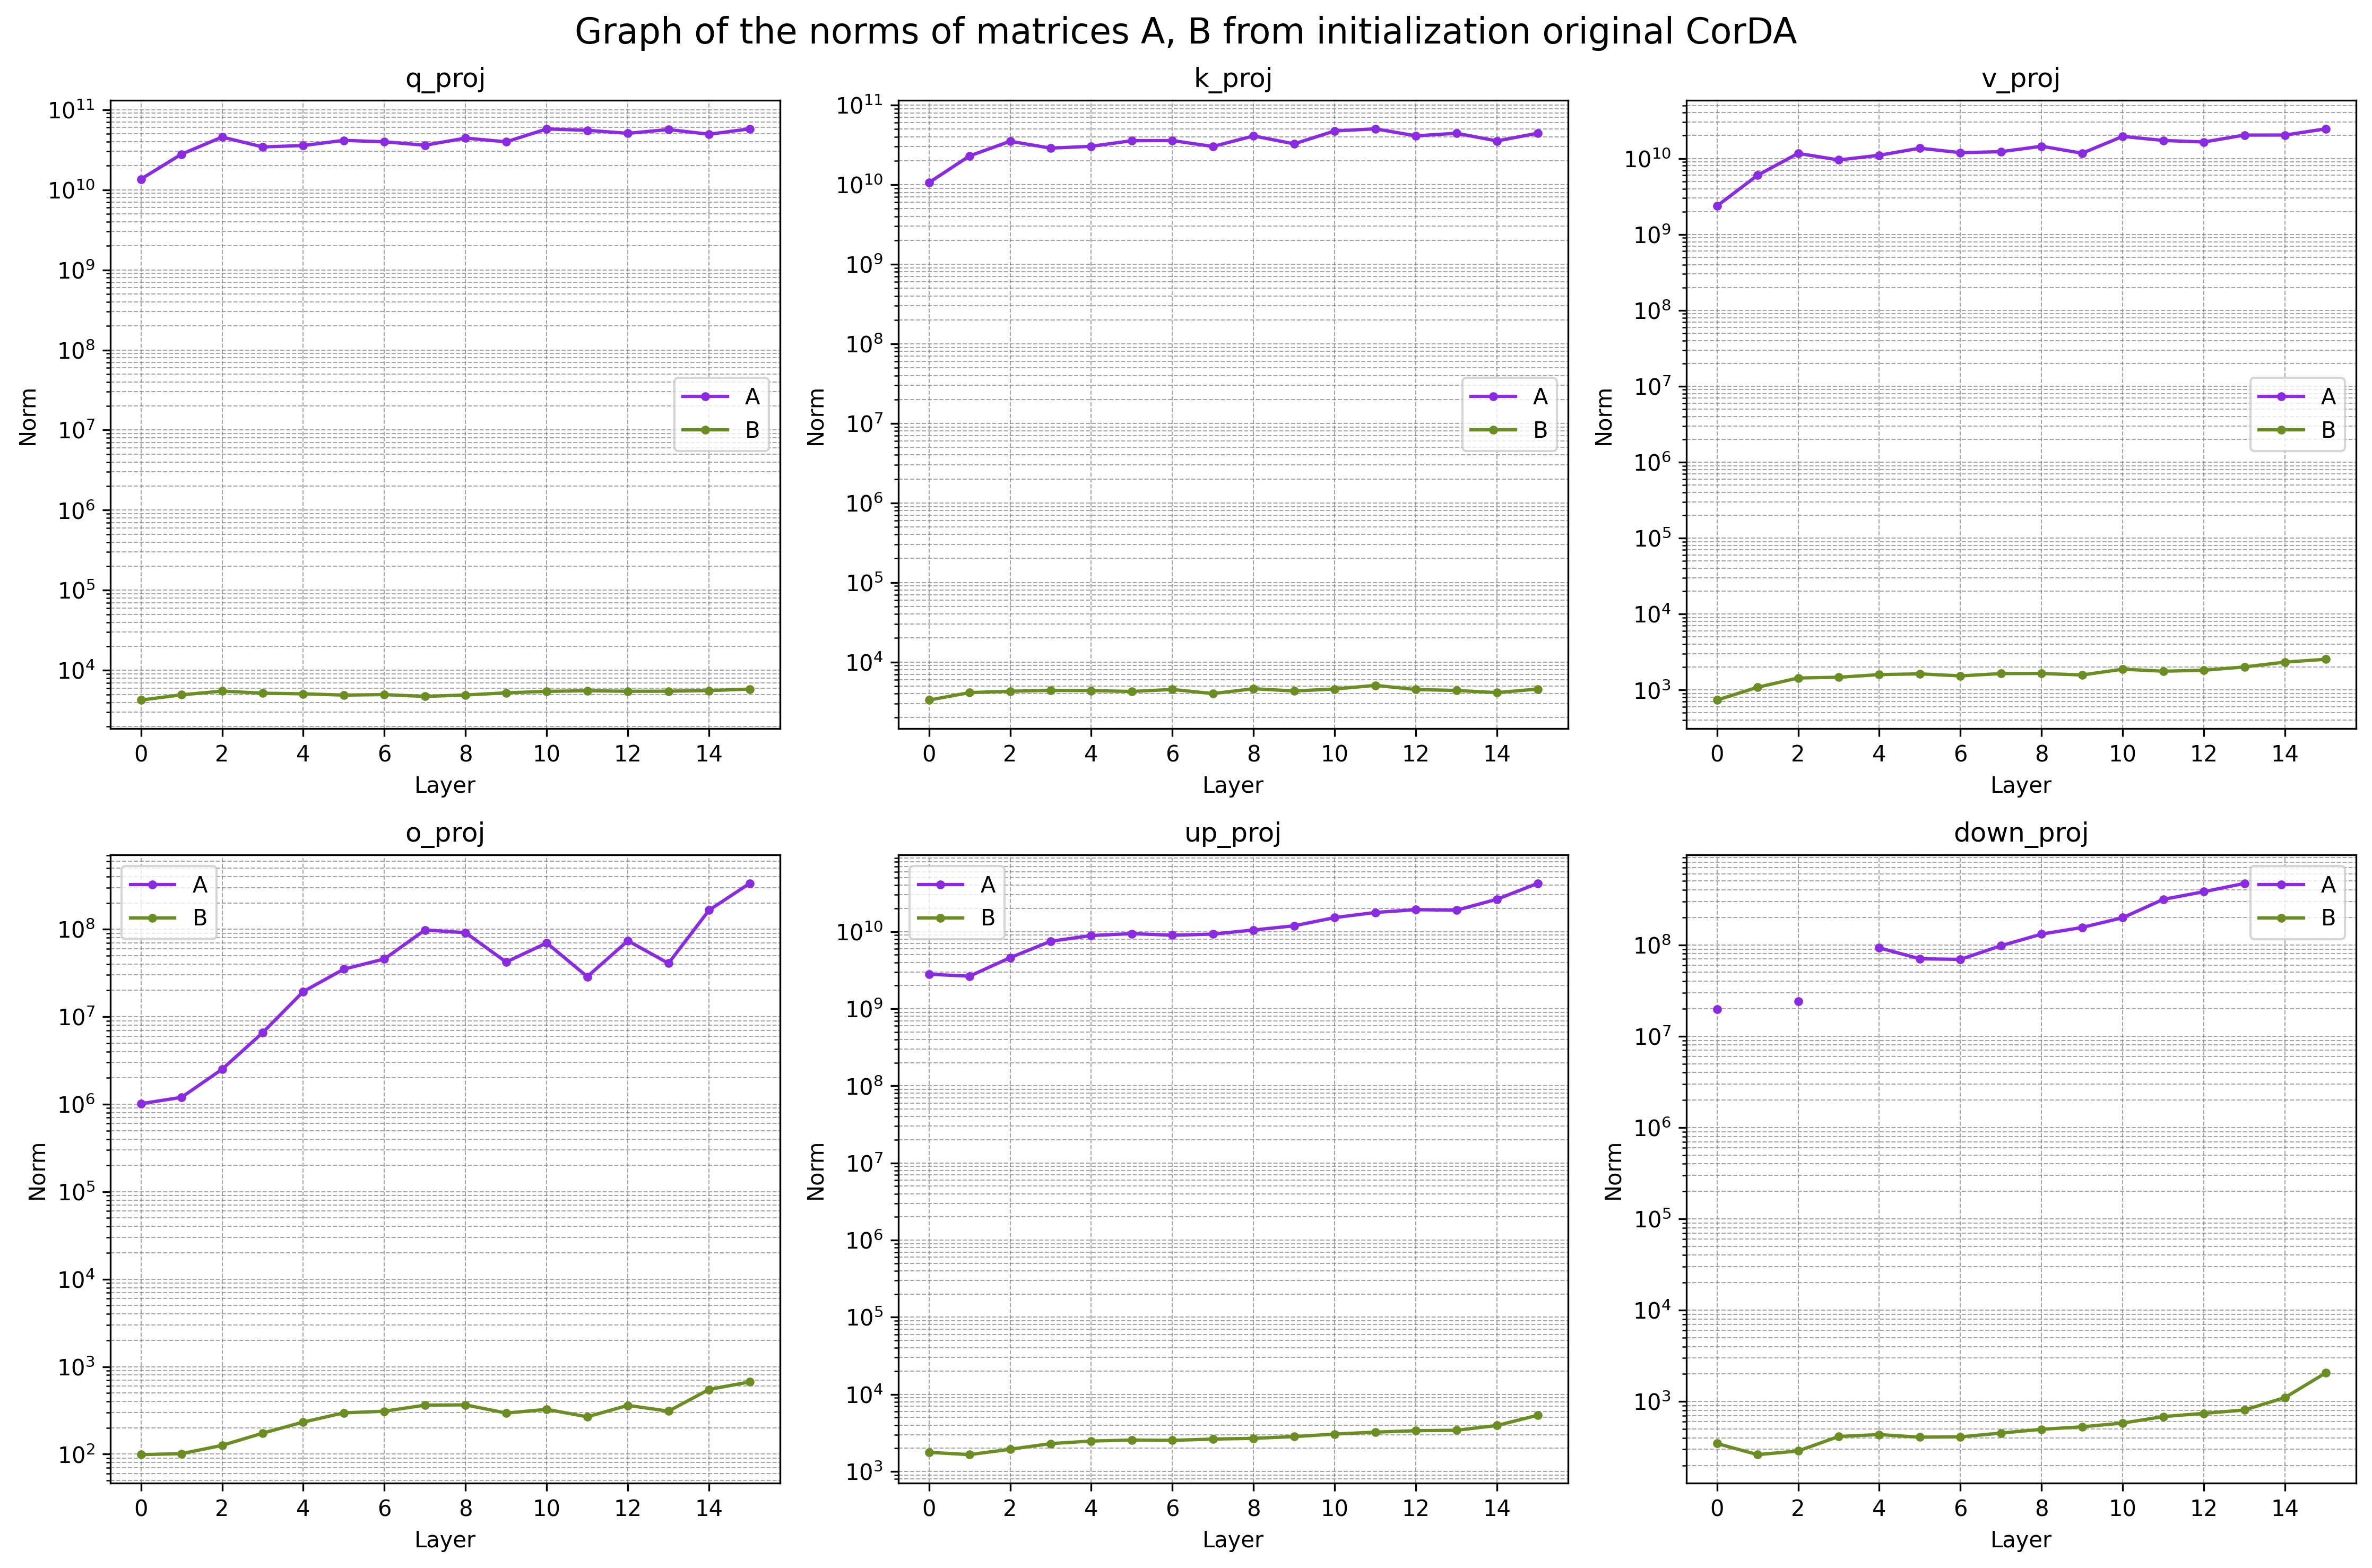

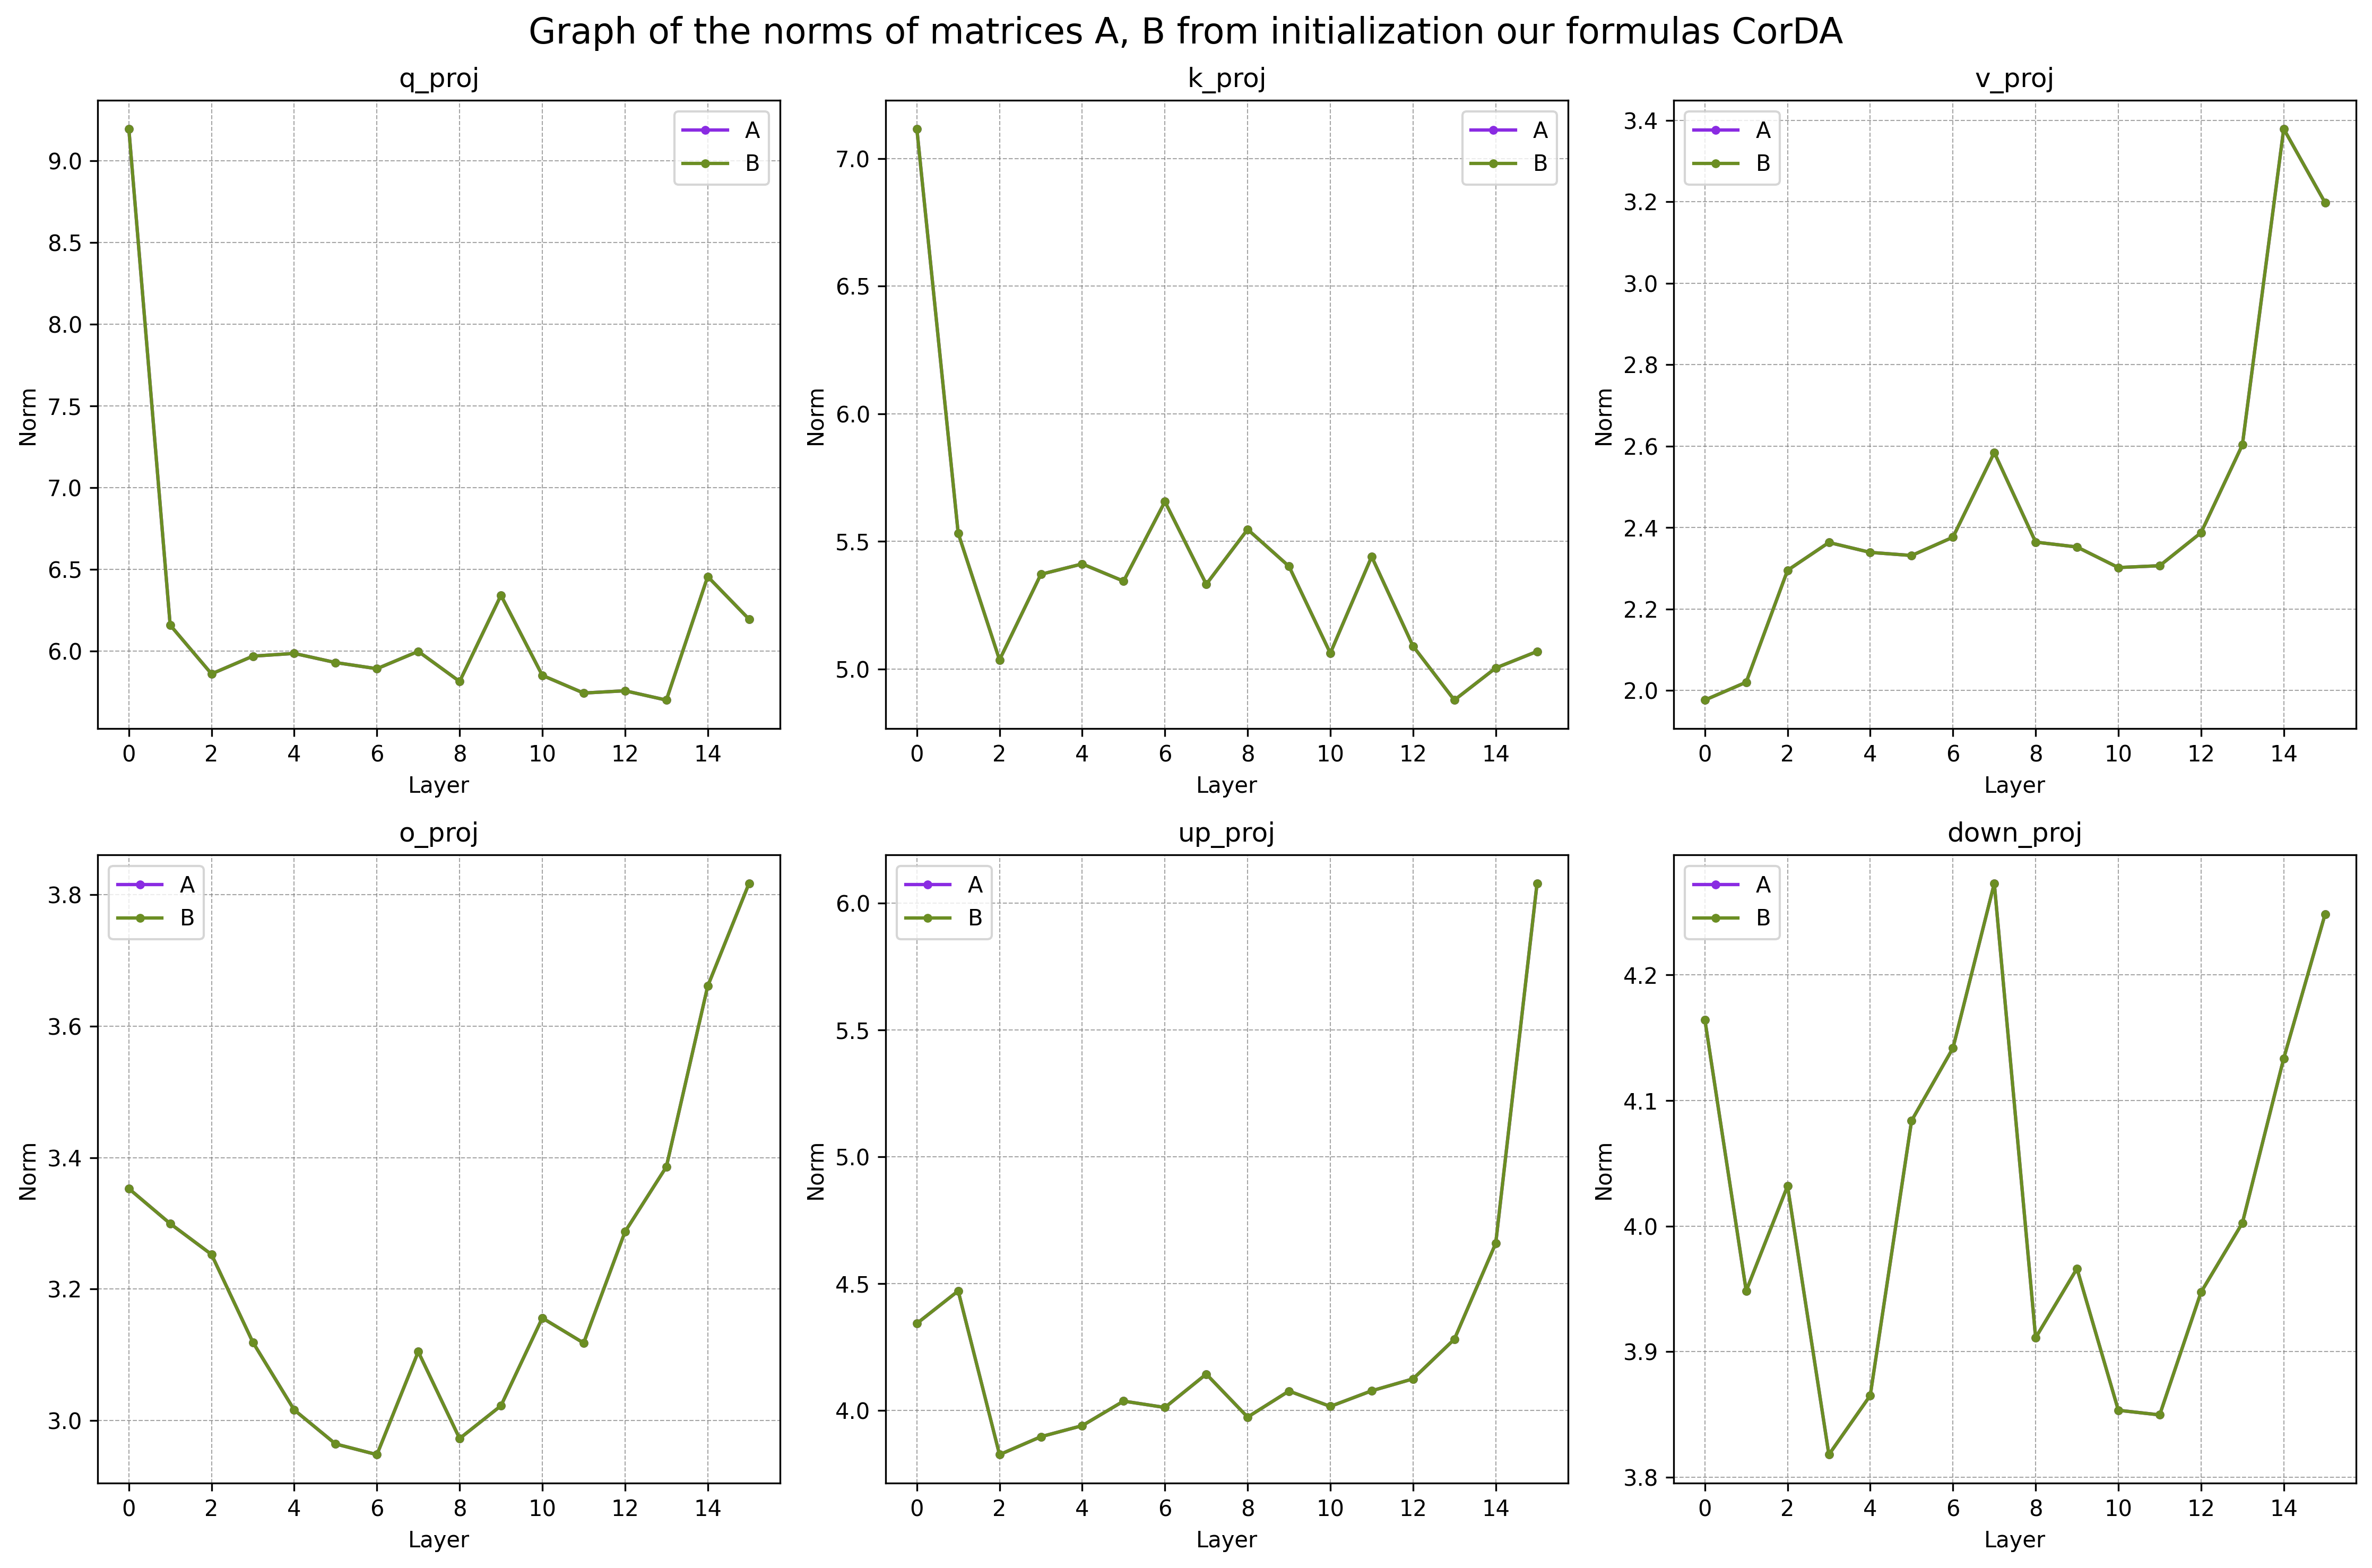

In [3]:
# create_graph('pissa', False)
create_graph('corda_original', True, 'Graph of the norms of matrices A, B from initialization original CorDA')
create_graph('corda', False, 'Graph of the norms of matrices A, B from initialization our formulas CorDA')
# create_graph('scorda', False)

In [4]:
with open('./results/initialization/singulars.pkl', 'rb') as file:
    logs = pickle.load(file)

print(logs)

{'W_s': {'model.layers.0.self_attn.q_proj': [30.883798599243164, 13.258135795593262, 11.300779342651367, 9.004268646240234, 8.623992919921875, 8.021985054016113, 7.787679672241211, 7.6590447425842285, 7.201883792877197, 6.730458736419678, 6.495357990264893, 6.266719341278076, 6.141368389129639, 5.779246807098389, 5.588922023773193, 5.572258949279785, 5.449495792388916, 5.389690399169922, 5.328936576843262, 5.158934116363525, 5.004624843597412, 4.98048734664917, 4.913207530975342, 4.787607192993164, 4.762588977813721, 4.690088272094727, 4.561273097991943, 4.553989410400391, 4.516801834106445, 4.4720892906188965, 4.430715084075928, 4.383652210235596, 4.355780124664307, 4.308459281921387, 4.269929885864258, 4.221444606781006, 4.202620506286621, 4.171518802642822, 4.15942907333374, 4.13200044631958, 4.106595039367676, 4.031077861785889, 4.025245189666748, 3.976759195327759, 3.952208995819092, 3.928849458694458, 3.909302234649658, 3.896472692489624, 3.8617687225341797, 3.8273534774780273, 3

In [5]:
sorted_data = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
}

for key, value in logs['W_s'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    sorted_data[category].append((layer_num, value))

for category in sorted_data:
    sorted_data[category].sort(key=lambda x: x[0])


/tmp/ipykernel_296146/1789672350.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


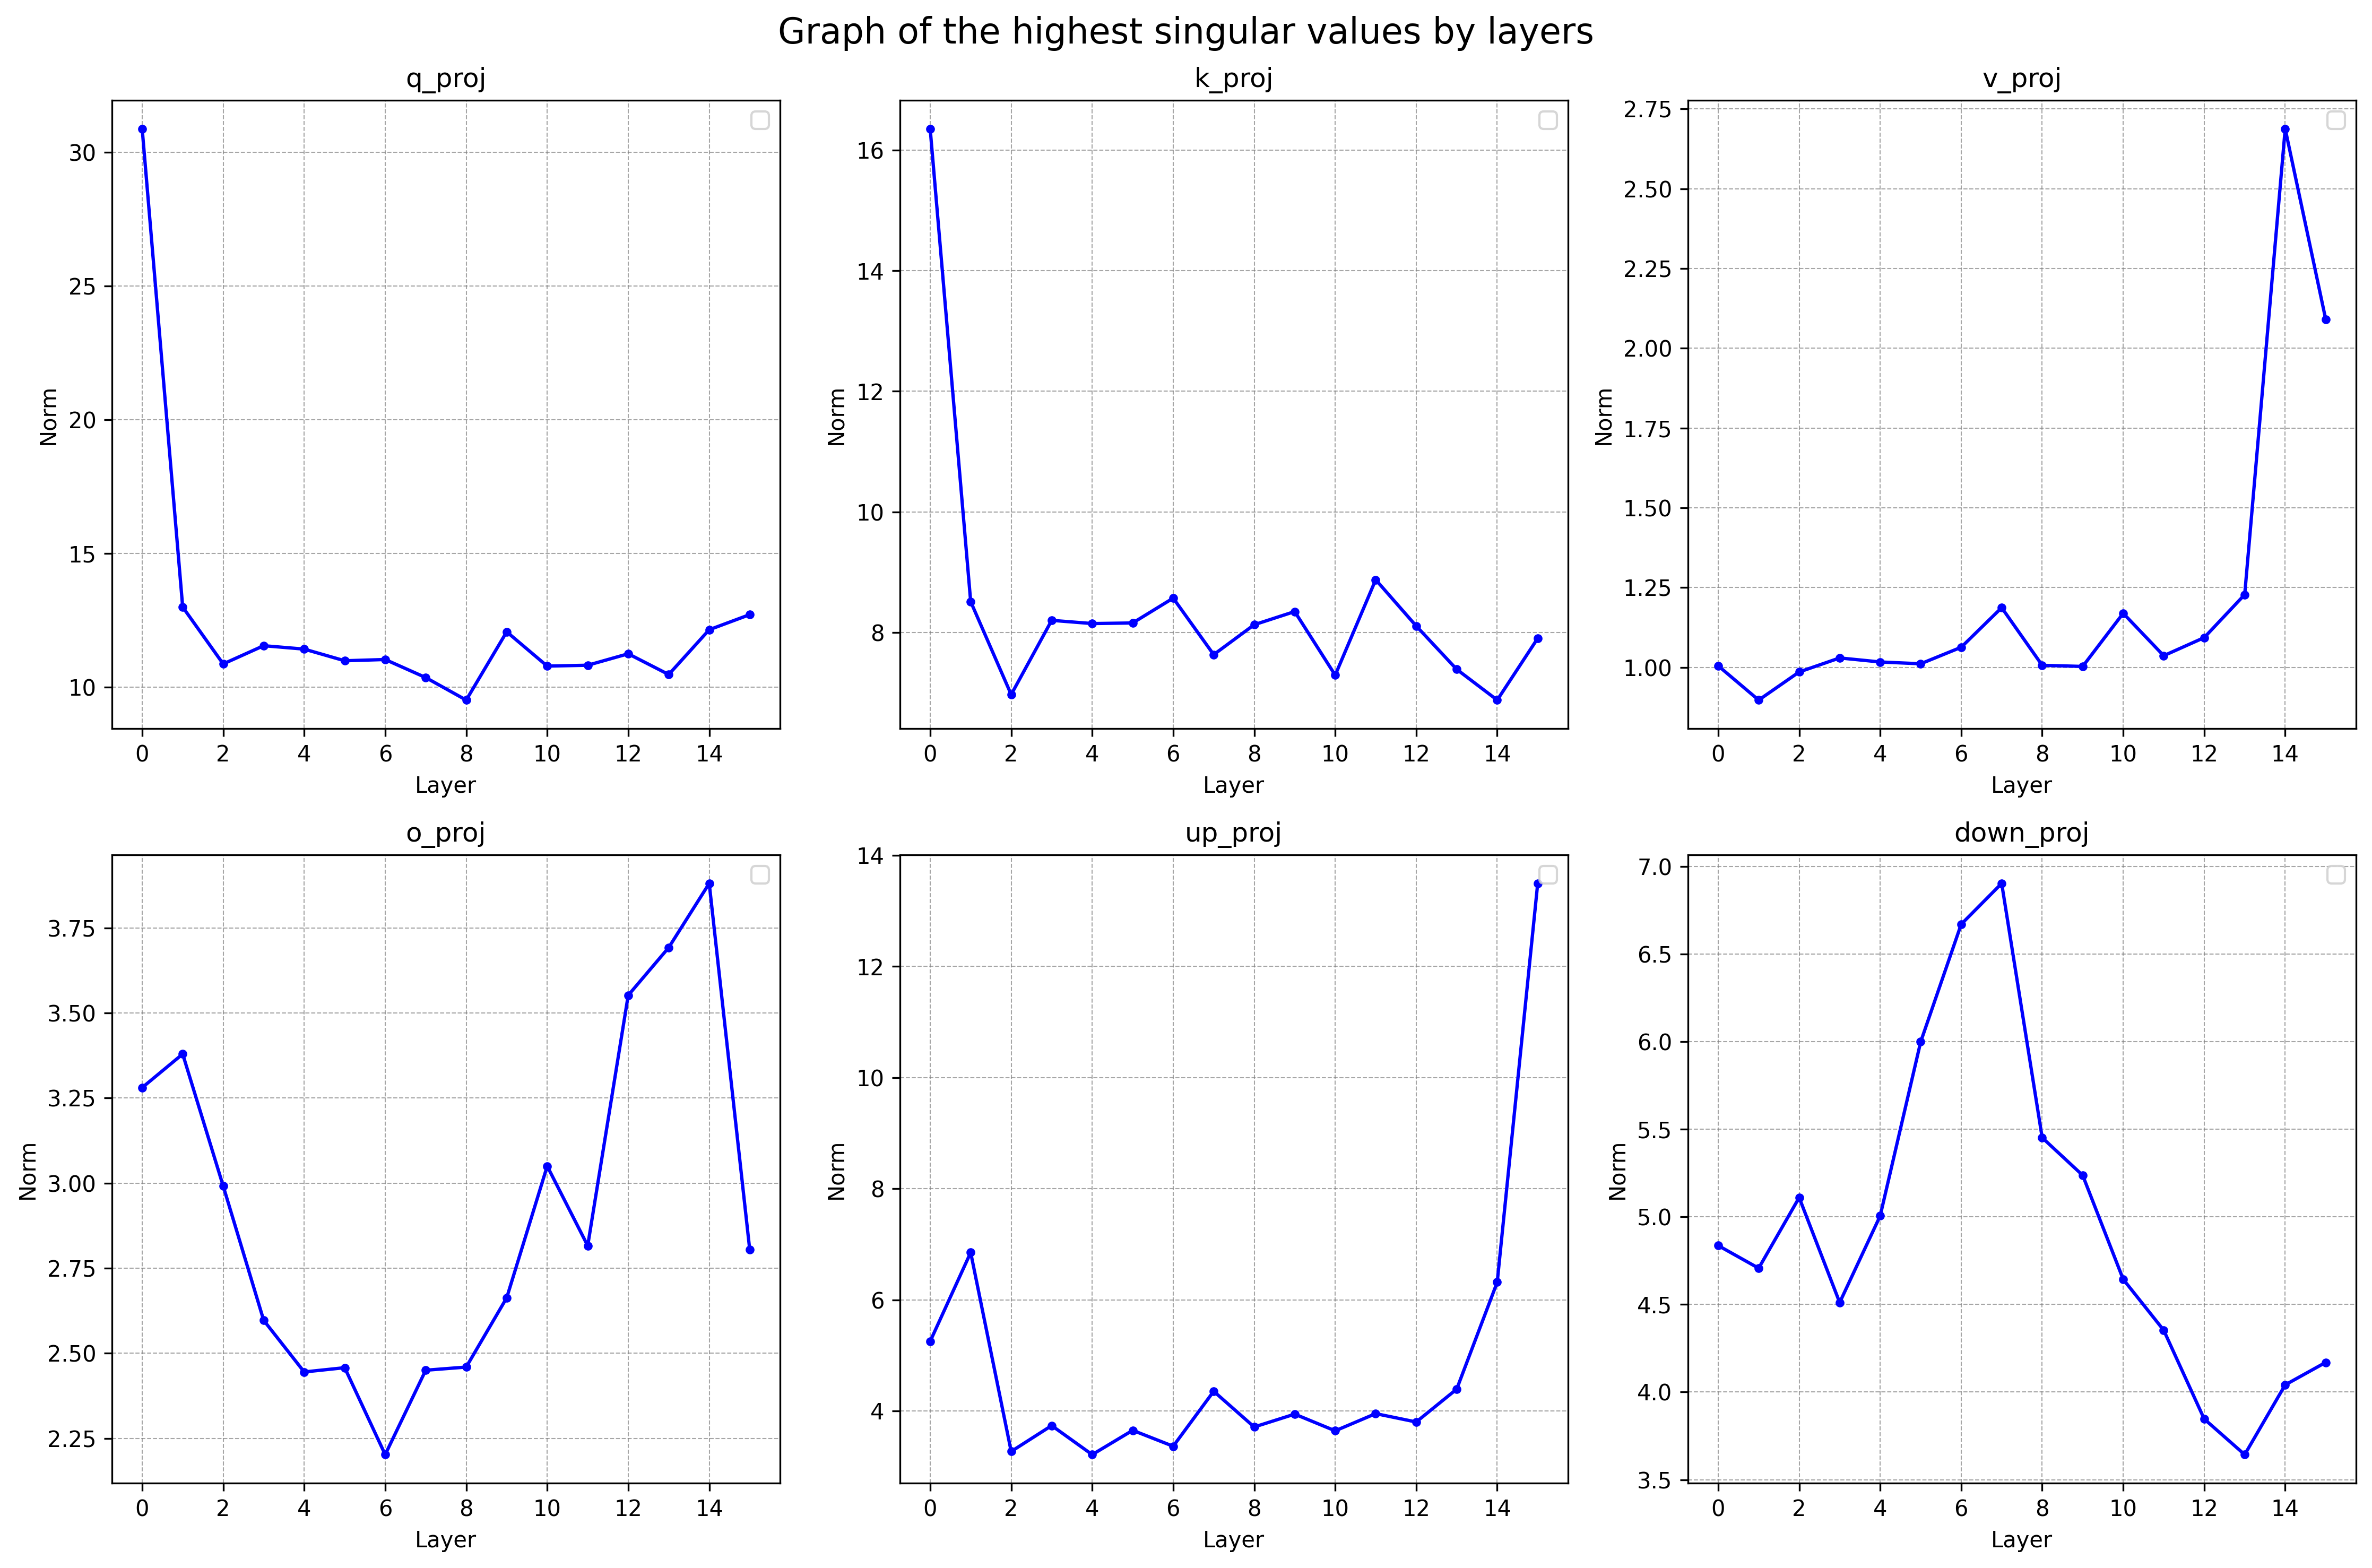

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

categories = list(sorted_data.keys())


for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values = zip(*sorted_data[category])
    
    max_values = [v[0] for v in values]

    ax.plot(layers, max_values, marker='.', color='blue')

    ax.set_title(category)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Norm')
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

fig.suptitle('Graph of the highest singular values by layers', fontsize=16)
plt.tight_layout()
plt.show()

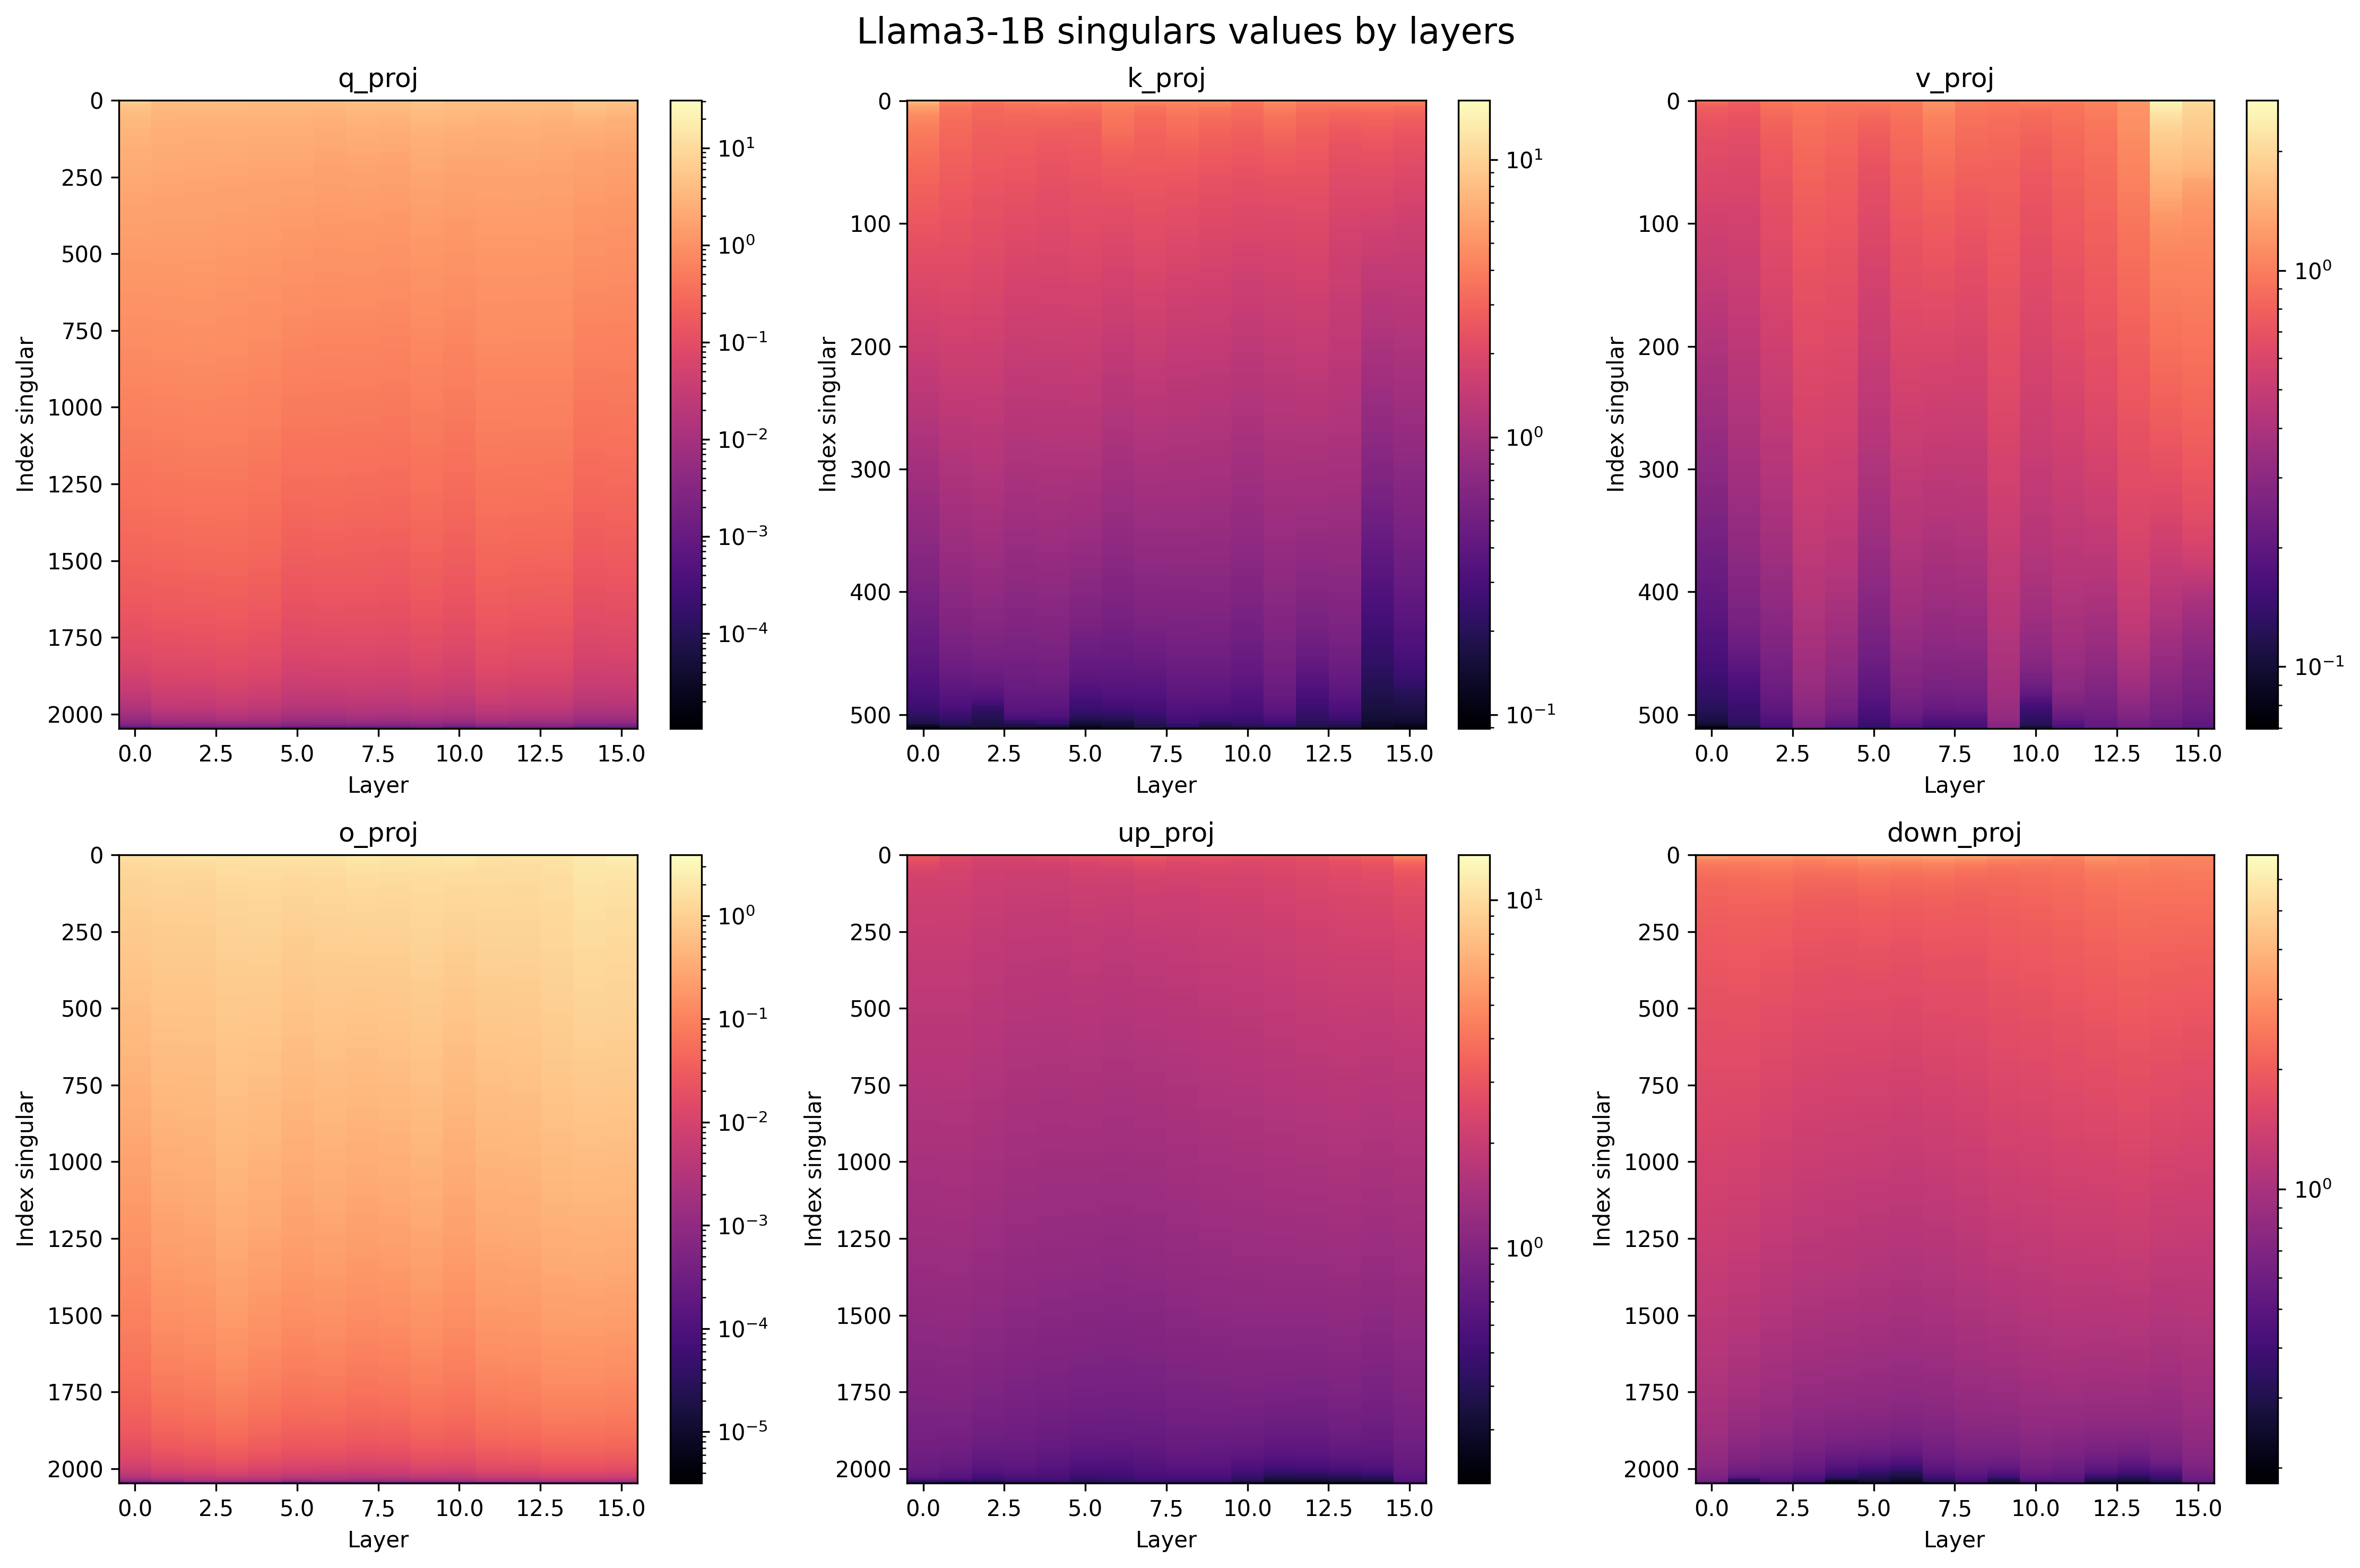

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

categories = list(sorted_data.keys())

for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values = zip(*sorted_data[category])

    data = np.array([v for v in values])

    # cax = ax.imshow(data.T, cmap='magma', origin='upper', aspect='auto', interpolation='nearest', norm=LogNorm())
    cax = ax.imshow(data.T, cmap='magma', origin='upper', aspect='auto', interpolation='nearest', norm=LogNorm())
    
    fig.colorbar(cax, ax=ax)
    
    ax.set_title(category)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Index singular')  # Index of the norm values
    # ax.set_xticks(np.arange(len(layers)))
    # ax.set_xticklabels(layers)
    # ax.set_yticks(np.arange(5))

    # ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
fig.suptitle('Llama3-1B singulars values by layers', fontsize=16)

plt.tight_layout()
plt.show()

In [8]:
import copy
with open('./results/initialization/pissa.pkl', 'rb') as file:
    logs_pissa = pickle.load(file)

with open('./results/initialization/scorda.pkl', 'rb') as file:
    logs_scorda = pickle.load(file)
    
with open('./results/initialization/corda.pkl', 'rb') as file:
    logs_corda = pickle.load(file)
    
pissa = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
}

scorda = copy.deepcopy(pissa)
corda = copy.deepcopy(pissa)

for key, value in logs_pissa['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    pissa[category].append((layer_num, value))

for category in pissa:
    pissa[category].sort(key=lambda x: x[0])
    
for key, value in logs_scorda['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    scorda[category].append((layer_num, value))

for category in scorda:
    scorda[category].sort(key=lambda x: x[0])
    
for key, value in logs_corda['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    corda[category].append((layer_num, value))

for category in corda:
    corda[category].sort(key=lambda x: x[0])


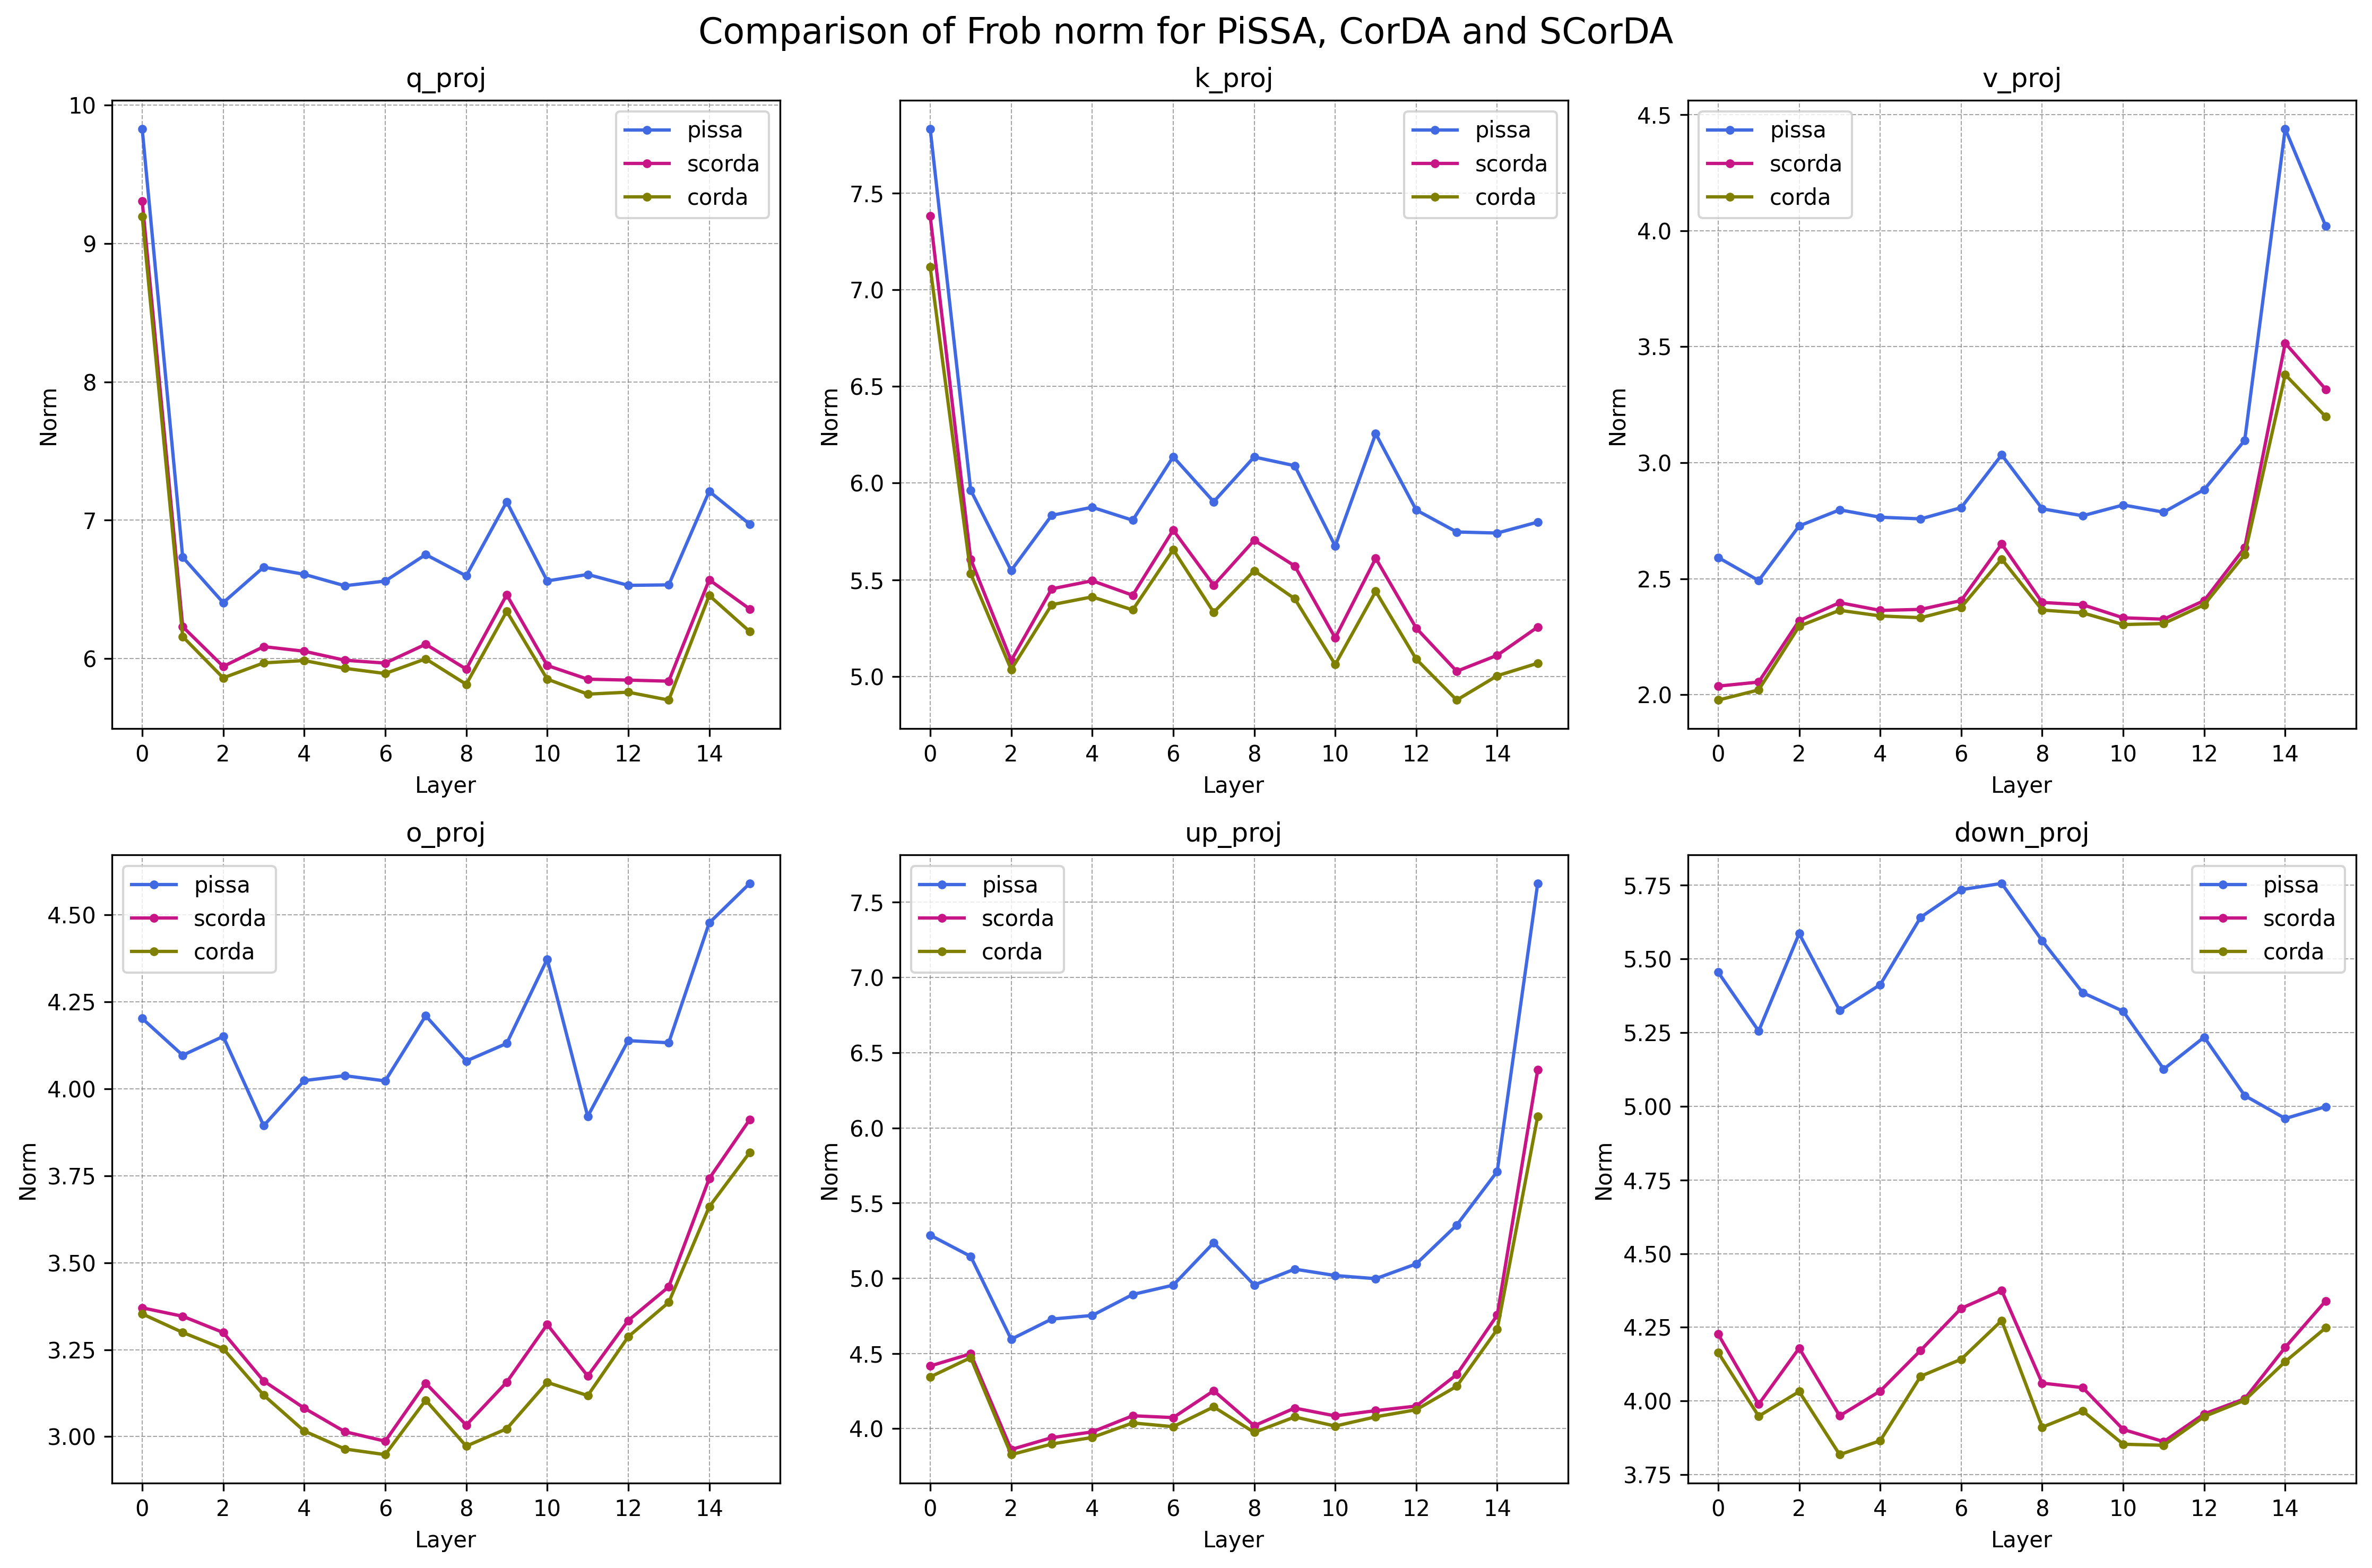

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

categories = list(pissa.keys())

colors = {'pissa': 'royalblue', 'scorda': 'mediumvioletred', 'corda': 'olive'}


for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values_pissa = zip(*pissa[category])
    layers, values_scorda = zip(*scorda[category])
    layers, values_corda = zip(*corda[category])
    
    pissa_values = [v['A'] for v in values_pissa]
    scorda_values = [v['A'] for v in values_scorda]
    corda_values = [v['A'] for v in values_corda]

    ax.plot(layers, pissa_values, label='pissa', marker='.', color=colors['pissa'])
    ax.plot(layers, scorda_values, label='scorda', marker='.', color=colors['scorda'])
    ax.plot(layers, corda_values, label='corda', marker='.', color=colors['corda'])

    ax.set_title(category)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Norm')
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

fig.suptitle('Comparison of Frob norm for PiSSA, CorDA and SCorDA', fontsize=16)
plt.tight_layout()
plt.show()